# cml1 - Immobilienrechner
# 2.1 Einfache lineare Regression und Residuenanalyse

Verwende ein einfaches lineares Modell zur Vorhersage von `price_cleaned` mit dem Attribut `Space extracted` oder `Floor_space_merged` (es gibt einige, wo beide fehlen (um die 800, können ignoriert werden).

Entwickle das Modell in einem Notebook. Untersuche dabei ob die Annahmen eines linearen Modells erfüllt sind mit geeigneten Darstellungen. Wie können Variablen-Transformationen verwendet werden, um die Modellvoraussetzungen besser zu erfüllen und das Modell zu verbessern?

Rapportiere und diskutiere die erreichte Genauigkeit der Vorhersage mit mehreren sinnvollen Metriken und auf unabhängigen Testdaten.

## Daten einlesen

Wir haben im Notebook "datawrangling.ipynb" den Datensatz bereinigt und lesen dieser hier ein. Die Aufgabe dieses Notebooks ist es, ein einfaches lineares Modell zu erstellen, um Vorhersagen von `price_cleaned` mit dem Attribut `Space extracted` oder `Floor_space_merged` zu machen. In unserem Fall ist der Attribut `Living_area_unified`, da wir alle "Nutzfläche" Variablen zusammengefasst haben.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
import xgboost as xgb

df = pd.read_csv('../data/immo_data_clean.csv', low_memory=False)

print(df.shape)

(21466, 47)


In [8]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# df without categorical columns
df_num = df.drop(categorical_cols, axis=1)

## Einfache lineare Regression und Residuenanalyse

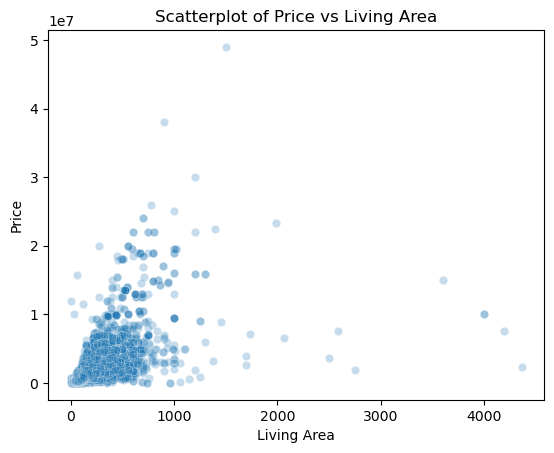

In [37]:
# subset dataset
df_simple = df[['Living_area_unified', 'price_cleaned']]

# drop na values
df_simple = df_simple.dropna(subset=['Living_area_unified'])

# split dataset
X = df_simple['Living_area_unified']
y = df_simple['price_cleaned']

sns.scatterplot(data=df_simple, x=X, y=y, alpha=0.25)
plt.title('Scatterplot of Price vs Living Area')
plt.ylabel('Price')
plt.xlabel('Living Area')
plt.show()

Anhand des Scatterplots sehen wir keine grosse Korrelaiton zwischen dem Preis und der Nutzfläche. Wir werden trotzdem eine lineare Regression durchführen, um die Residuen zu analysieren.

Erstellen wir nun eine Funktion, bei der wir verschiedene Modelle erstellen können. Die Funktion wird folgendermassen gestaltet:

Eingabe:
1. $X$ (Feature-Daten)
2. $y$ (Zielvariable)
3. Eine Transformationsfunktion (optional), die auf $X$ angewendet wird, bevor die Regression durchgeführt wird.

Ausgabe:
1. Ein Plot mit drei Subplots: "Actual vs Predicted Price", "Residuals" und "Residuals Histogram".

In [64]:
def perform_linear_regression(X, y, transformation_func=None):
    # Apply transformation if provided
    if transformation_func:
        X = transformation_func(X)
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train linear regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train.values.reshape(-1, 1), y_train)
    y_pred = lin_reg.predict(X_test.values.reshape(-1, 1))
    r2 = r2_score(y_test, y_pred)
    
    # Plotting
    fig, ax = plt.subplots(1, 3, figsize=(16, 6))
    
    # Actual vs Predicted plot
    sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.1}, ax=ax[0])
    ax[0].set_title(f'Actual vs Predicted Price - R2: {r2:.4f}')
    ax[0].set_xlabel('Actual Price')
    ax[0].set_ylabel('Predicted Price')

    # Residuals plot
    sns.residplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.1}, ax=ax[1])
    ax[1].set_title('Residuals')
    ax[1].set_xlabel('Actual Price')
    ax[1].set_ylabel('Residuals')

    # Histogram plot
    sns.histplot((y_test - y_pred), ax=ax[2])
    ax[2].set_title('Residuals Histogram')
    ax[2].set_xlabel('Residuals')
    ax[2].set_ylabel('Frequency')
    
    plt.show()


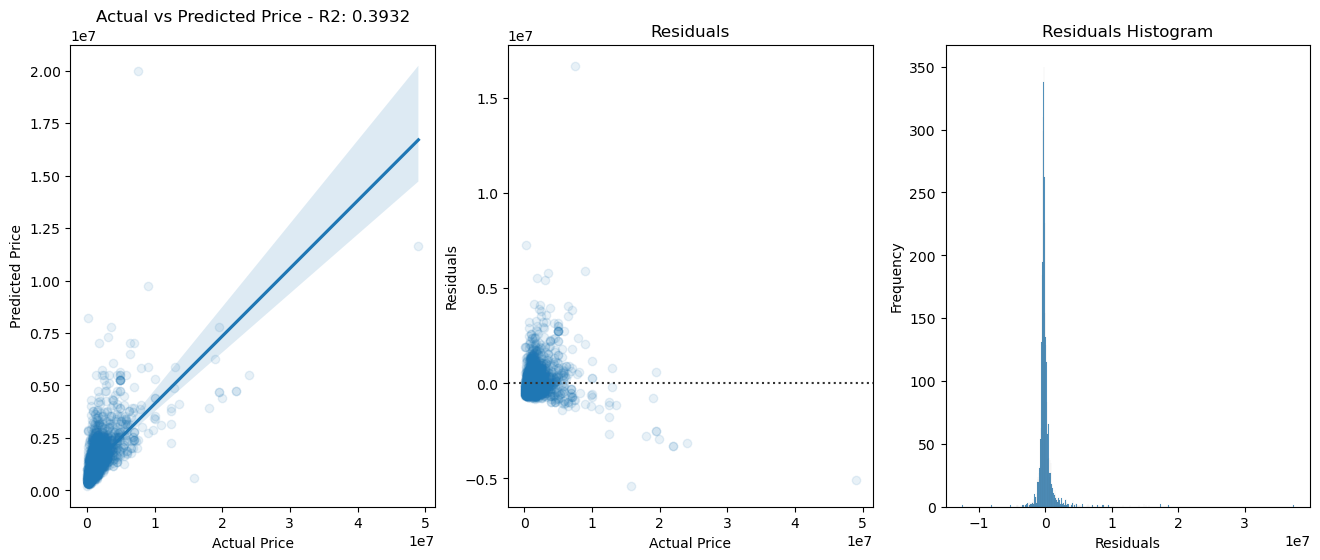

In [65]:
# Linear regression without transformation
perform_linear_regression(X, y, None)

Es ist gut zu sehen, dass das Modell sehr schlecht ist. 
- $R^2$ ist sehr klein
- Die Residuen streuen sich nicht um den Erwartungswert 0.
- Die Residuen sind recht normalverteilt, aber es gibt sehr grosse Ausreisser.

Um das Modell zu verbessern, werden wir die X-Variablen-Transformation machen.
- Log
- Quadrat
- Quadratwurzel

### Log-Transformation

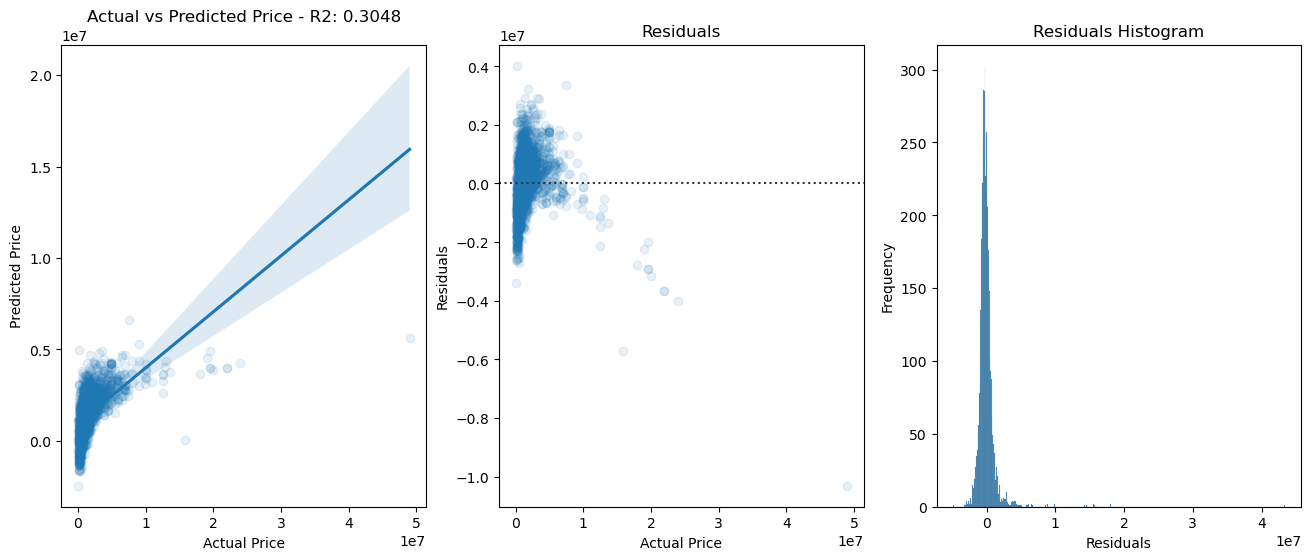

In [47]:
perform_linear_regression(X, y, transformation_func=np.log)

### Quadrat-Transformation

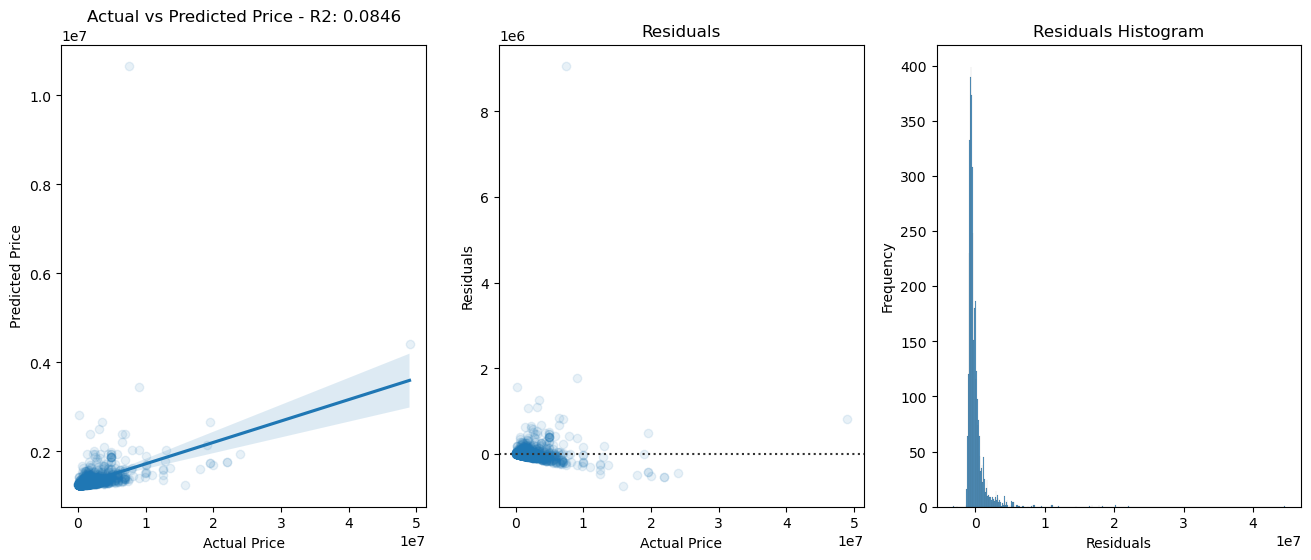

In [48]:
perform_linear_regression(X, y, transformation_func=np.square)

### Quadratwurzel-Transformation

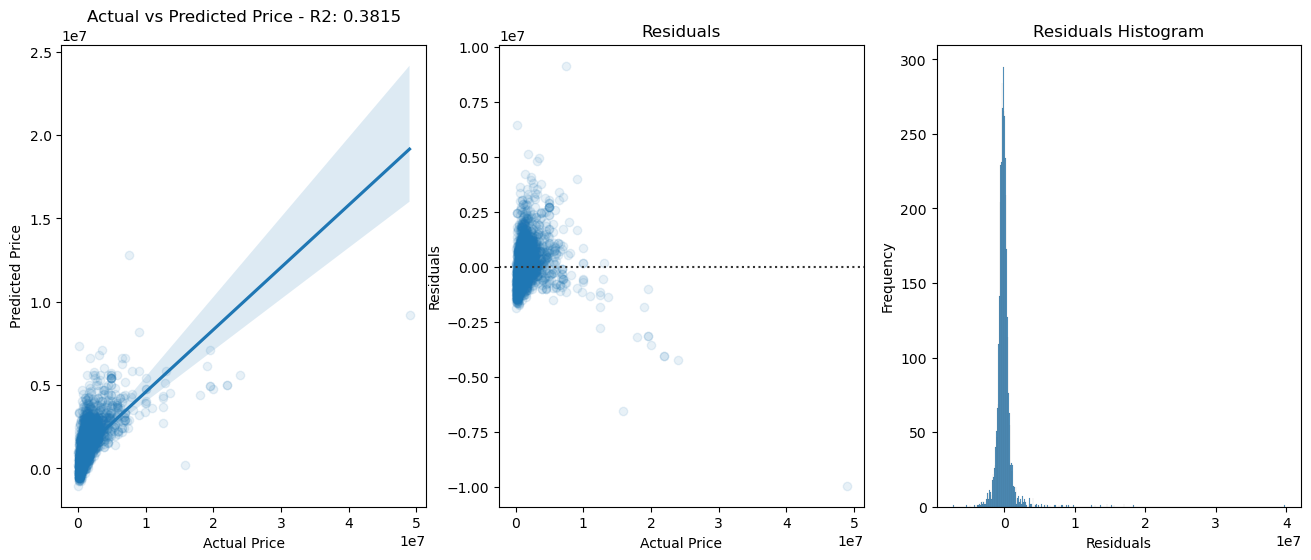

In [49]:
perform_linear_regression(X, y, transformation_func=np.sqrt)